In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import plotly.express as px
import plotly.graph_objs as go
import numpy as np
import math

In [25]:
df_sjc = pd.read_csv('data/SJC.csv')
df_pnj = pd.read_csv('data/PNJ.csv')
df_sjc['date'] = pd.to_datetime(df_sjc['date'])
df_pnj['date'] = pd.to_datetime(df_pnj['date'])

In [26]:
df_sjc.head()

,type,buy,sell,date
0,SJC,36.84,36.72,2014-06-23
1,SJC,36.81,36.71,2014-06-24
2,SJC,36.85,36.75,2014-06-25
3,SJC,36.83,36.75,2014-06-26
4,SJC,36.78,36.70,2014-06-27


## What heighest gold price of PNJ and SJC

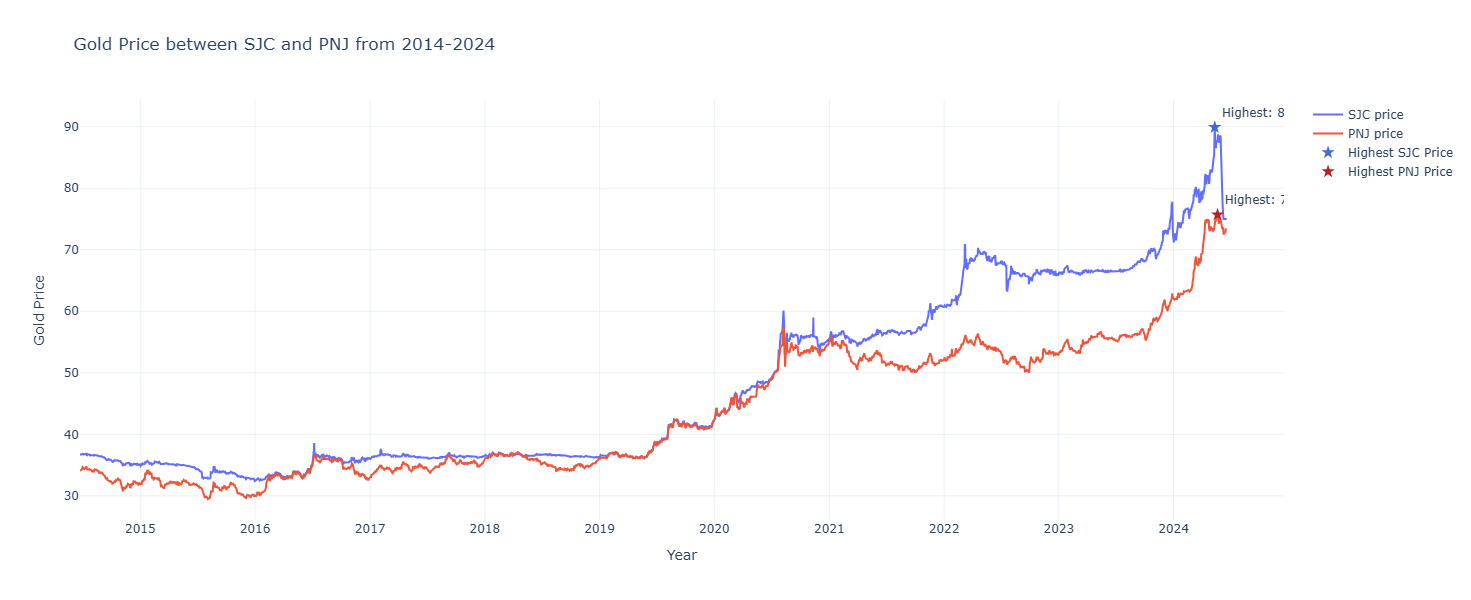

In [10]:
# Find the highest price for SJC and PNJ
max_price_sjc = df_sjc['sell'].max()
max_price_pnj = df_pnj['sell'].max()

# Get the dates for the highest prices
max_date_sjc = df_sjc[df_sjc['sell'] == max_price_sjc]['date'].iloc[0]
max_date_pnj = df_pnj[df_pnj['sell'] == max_price_pnj]['date'].iloc[0]

# Create the plot
fig = go.Figure()

# Add traces for SJC and PNJ
fig.add_trace(go.Scatter(x=df_sjc['date'], y=df_sjc['sell'], mode='lines', name='SJC price'))
fig.add_trace(go.Scatter(x=df_pnj['date'], y=df_pnj['sell'], mode='lines', name='PNJ price'))

# Add annotations for the highest prices
fig.add_trace(go.Scatter(
    x=[max_date_sjc], y=[max_price_sjc], mode='markers+text', name='Highest SJC Price',
    marker=dict(size=10, color='royalblue', symbol='star'),
    text=[f'Highest: {max_price_sjc}'],
    textposition='top right'
))

fig.add_trace(go.Scatter(
    x=[max_date_pnj], y=[max_price_pnj], mode='markers+text', name='Highest PNJ Price',
    marker=dict(size=10, color='firebrick', symbol='star'),
    text=[f'Highest: {max_price_pnj}'],
    textposition='top right'
))

# Update layout
fig.update_layout(
    title='Gold Price between SJC and PNJ from 2014-2024',
    xaxis_title='Year',
    yaxis_title='Gold Price',
    xaxis=dict(
        tickformat='%Y',
        tickmode='linear',
        dtick='M12', # Set tick interval to 1 year
    ),
    template='plotly_white',
    width=1200,  # Set the width of the plot
    height=600   # Set the height of the plot
)

# Show the plot
fig.show()

**2014-2016: Gold prices experienced a continuous decline for two consecutive years, 2016-2018: Gold prices entered a consolidation phase, characterized by relatively stable prices, 2019: Gold prices reached their peak for this period, driven by various factors, 2020-2022: Gold prices witnessed a surge due to the combined impact of the COVID-19 pandemic, geopolitical tensions, and economic uncertainties, 2024 and beyond: Gold prices are expected to continue their upward trend if global economic instability persists.**

## Comapare gold price between PNJ and SJC
What is the highest different between them and what is higher? -> Why

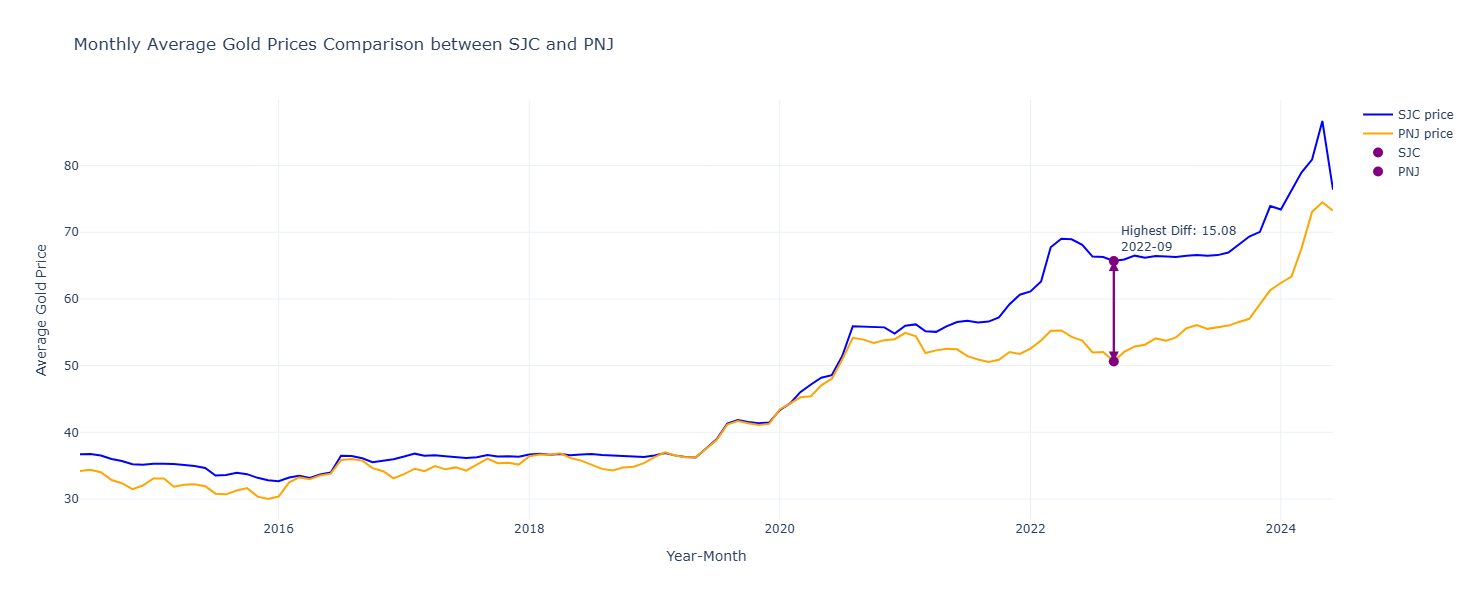

In [49]:
# Find the month with the highest difference
max_diff_row = df_diff.loc[df_diff['difference'].idxmax()]

# Create the plot
fig = go.Figure()

# Add traces for SJC and PNJ monthly average prices
fig.add_trace(go.Scatter(x=df_sjc_monthly['year_month'], y=df_sjc_monthly['sell'], mode='lines', name='SJC price', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=df_pnj_monthly['year_month'], y=df_pnj_monthly['sell'], mode='lines', name='PNJ price', line=dict(color='orange')))

# Highlight the month with the highest difference
fig.add_trace(go.Scatter(
    x=[max_diff_row['year_month']],
    y=[max_diff_row['sell_sjc']],
    mode='markers+text',
    name='SJC',
    marker=dict(size=10, color='purple'),
    text=[f'Highest Diff: {max_diff_row["difference"]:.2f}<br>{max_diff_row["year_month"]}'],
    textposition='top right'
))

fig.add_trace(go.Scatter(
    x=[max_diff_row['year_month']],
    y=[max_diff_row['sell_pnj']],
    mode='markers',
    name='PNJ',
    marker=dict(size=10, color='purple'),
    # text=[f'Highest Diff: {max_diff_row["difference"]:.2f}<br>{max_diff_row["year_month"]}'],
    textposition='top left'
))

# Draw a bidirectional arrow
fig.add_annotation(
    x=max_diff_row['year_month'],
    y=max_diff_row['sell_sjc'],
    ax=max_diff_row['year_month'],
    ay=max_diff_row['sell_pnj'],
    xref='x',
    yref='y',
    axref='x',
    ayref='y',
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='purple'
)

fig.add_annotation(
    x=max_diff_row['year_month'],
    y=max_diff_row['sell_pnj'],
    ax=max_diff_row['year_month'],
    ay=max_diff_row['sell_sjc'],
    xref='x',
    yref='y',
    axref='x',
    ayref='y',
    showarrow=True,
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor='purple'
)
# Update layout
fig.update_layout(
    title='Monthly Average Gold Prices Comparison between SJC and PNJ',
    xaxis_title='Year-Month',
    yaxis_title='Average Gold Price',
    template='plotly_white',
    width=1200,  # Set the width of the plot
    height=600   # Set the height of the plot
)

# Show the plot
fig.show()

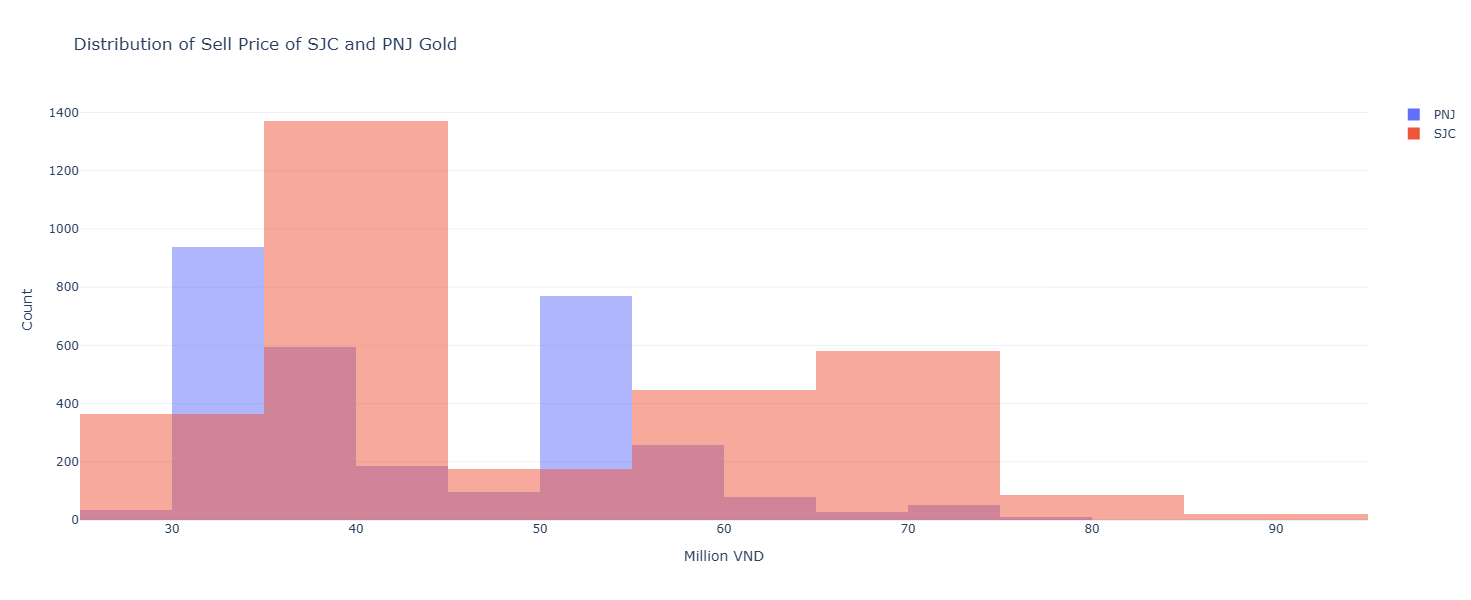

In [98]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df_pnj['sell'],name='PNJ',nbinsx=10))
fig.add_trace(go.Histogram(x=df_sjc['sell'],name='SJC',nbinsx=10))
# The two histograms are drawn on top of another
fig.update_layout(
    barmode='overlay',
    title='Distribution of Sell Price of SJC and PNJ Gold',
    xaxis_title='Million VND',
    yaxis_title='Count',
    template='plotly_white',
    width=1200,  # Set the width of the plot
    height=600   # Set the height of the plot
)
fig.update_traces(overwrite=True, marker={"opacity": 0.5}) 
fig.show()